In [5]:
import torch
import pandas as pd
from metrics import get_total_metrics
from graphics import get_heatmap, get_differential_heatmap, get_pairs_heatmap

In [42]:
drug_target_data = pd.read_csv('../analysis/kiba_d_t_aff_smiles_split.csv')

In [43]:
test_data = drug_target_data[drug_target_data['split'] == 2] 
del test_data['split']

In [44]:
test_data

,drug,target,affinity,smiles
94602,CHEMBL2001923,154,11.200000,C1COCCN1C2=CC=C(C=C2)OCCC3=CC4=C(C=C3)NC5=C(C=...
94603,CHEMBL248757,7,12.122734,C1CCOC2=NC(=CN=C2C#N)NC(=O)NC3=CC(=C(C=C3OC1)N...
94604,CHEMBL1993781,177,13.800057,C1=CC=C(C=C1)COCC(COC2=CN=CC(=C2)C=CC3=CC=NC=C3)N
94605,CHEMBL1998585,168,11.200000,C1=CC(=CC=C1C2=CSC3=NC=NC(=C23)N)NC(=O)NC4=C(C...
94606,CHEMBL2005528,141,11.600000,CCOC(=O)C1=CC2=C(C=C1)NC3=C2CCNC3=O
...,...,...,...,...
118249,CHEMBL2006765,45,11.699999,CCCNC(=O)C1=CC=C(C=C1)NC2=NC3=C(C=CN3)C(=N2)NC...
118250,CHEMBL1982874,107,11.999998,C1CC1CN2C3=C(C=CC(=C3)C4=C(N=C5N4C=CS5)C6=CC=C...
118251,CHEMBL1985042,15,10.400000,CC1=CC(=O)NC2=C1C(=O)N(N2)C3=CC=CC=C3
118252,CHEMBL1982466,165,12.399998,CC1=CC=C(C=C1)NC(=O)NC2=CC=C(C=C2)C3=CSC4=C3C(...


In [45]:
pred = torch.load('../analysis/DTI_tl_nf_train_best_1504')

In [46]:
pred

tensor([11.1244, 12.3287, 12.6801,  ..., 10.4599, 12.8409, 11.0872])

In [47]:
test_data.insert(4, 'predicted', pred)
test_data

,drug,target,affinity,smiles,predicted
94602,CHEMBL2001923,154,11.200000,C1COCCN1C2=CC=C(C=C2)OCCC3=CC4=C(C=C3)NC5=C(C=...,11.124387
94603,CHEMBL248757,7,12.122734,C1CCOC2=NC(=CN=C2C#N)NC(=O)NC3=CC(=C(C=C3OC1)N...,12.328746
94604,CHEMBL1993781,177,13.800057,C1=CC=C(C=C1)COCC(COC2=CN=CC(=C2)C=CC3=CC=NC=C3)N,12.680149
94605,CHEMBL1998585,168,11.200000,C1=CC(=CC=C1C2=CSC3=NC=NC(=C23)N)NC(=O)NC4=C(C...,11.213024
94606,CHEMBL2005528,141,11.600000,CCOC(=O)C1=CC2=C(C=C1)NC3=C2CCNC3=O,11.484001
...,...,...,...,...,...
118249,CHEMBL2006765,45,11.699999,CCCNC(=O)C1=CC=C(C=C1)NC2=NC3=C(C=CN3)C(=N2)NC...,12.499822
118250,CHEMBL1982874,107,11.999998,C1CC1CN2C3=C(C=CC(=C3)C4=C(N=C5N4C=CS5)C6=CC=C...,11.836589
118251,CHEMBL1985042,15,10.400000,CC1=CC(=O)NC2=C1C(=O)N(N2)C3=CC=CC=C3,10.459930
118252,CHEMBL1982466,165,12.399998,CC1=CC=C(C=C1)NC(=O)NC2=CC=C(C=C2)C3=CSC4=C3C(...,12.840940


In [48]:
test_data.columns = ['drug', 'target', 'affinity', 'SMILES', 'predicted']
test_data

,drug,target,affinity,SMILES,predicted
94602,CHEMBL2001923,154,11.200000,C1COCCN1C2=CC=C(C=C2)OCCC3=CC4=C(C=C3)NC5=C(C=...,11.124387
94603,CHEMBL248757,7,12.122734,C1CCOC2=NC(=CN=C2C#N)NC(=O)NC3=CC(=C(C=C3OC1)N...,12.328746
94604,CHEMBL1993781,177,13.800057,C1=CC=C(C=C1)COCC(COC2=CN=CC(=C2)C=CC3=CC=NC=C3)N,12.680149
94605,CHEMBL1998585,168,11.200000,C1=CC(=CC=C1C2=CSC3=NC=NC(=C23)N)NC(=O)NC4=C(C...,11.213024
94606,CHEMBL2005528,141,11.600000,CCOC(=O)C1=CC2=C(C=C1)NC3=C2CCNC3=O,11.484001
...,...,...,...,...,...
118249,CHEMBL2006765,45,11.699999,CCCNC(=O)C1=CC=C(C=C1)NC2=NC3=C(C=CN3)C(=N2)NC...,12.499822
118250,CHEMBL1982874,107,11.999998,C1CC1CN2C3=C(C=CC(=C3)C4=C(N=C5N4C=CS5)C6=CC=C...,11.836589
118251,CHEMBL1985042,15,10.400000,CC1=CC(=O)NC2=C1C(=O)N(N2)C3=CC=CC=C3,10.459930
118252,CHEMBL1982466,165,12.399998,CC1=CC=C(C=C1)NC(=O)NC2=CC=C(C=C2)C3=CSC4=C3C(...,12.840940


In [49]:
test_data.to_csv('../analysis/DTI_tl_nf_train_best_1504_preds.csv', index=False)

In [50]:
#preds = pd.read_csv('../analysis/DTI_vary_all_train_best_1404_preds.csv')
preds = test_data

In [51]:
preds

,drug,target,affinity,SMILES,predicted
94602,CHEMBL2001923,154,11.200000,C1COCCN1C2=CC=C(C=C2)OCCC3=CC4=C(C=C3)NC5=C(C=...,11.124387
94603,CHEMBL248757,7,12.122734,C1CCOC2=NC(=CN=C2C#N)NC(=O)NC3=CC(=C(C=C3OC1)N...,12.328746
94604,CHEMBL1993781,177,13.800057,C1=CC=C(C=C1)COCC(COC2=CN=CC(=C2)C=CC3=CC=NC=C3)N,12.680149
94605,CHEMBL1998585,168,11.200000,C1=CC(=CC=C1C2=CSC3=NC=NC(=C23)N)NC(=O)NC4=C(C...,11.213024
94606,CHEMBL2005528,141,11.600000,CCOC(=O)C1=CC2=C(C=C1)NC3=C2CCNC3=O,11.484001
...,...,...,...,...,...
118249,CHEMBL2006765,45,11.699999,CCCNC(=O)C1=CC=C(C=C1)NC2=NC3=C(C=CN3)C(=N2)NC...,12.499822
118250,CHEMBL1982874,107,11.999998,C1CC1CN2C3=C(C=CC(=C3)C4=C(N=C5N4C=CS5)C6=CC=C...,11.836589
118251,CHEMBL1985042,15,10.400000,CC1=CC(=O)NC2=C1C(=O)N(N2)C3=CC=CC=C3,10.459930
118252,CHEMBL1982466,165,12.399998,CC1=CC=C(C=C1)NC(=O)NC2=CC=C(C=C2)C3=CSC4=C3C(...,12.840940


In [52]:
results = get_total_metrics(preds, threshold_affinity=[0, 1, 1.5, 2, 2.5, 3, 3.5, 4], threshold_similarity=[0, 0.1, 0.3, 0.5, 0.7, 0.9])

100%|██████████| 3/3 [00:00<00:00, 3002.37it/s]
0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<?, ?it/s]
0it [00:00, ?it/s]
100%|██████████| 1/1 [00:00<?, ?it/s]
C:\Users\rena_\git\AC-DTI\venv\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\rena_\git\AC-DTI\venv\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\rena_\git\AC-DTI\venv\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
C:\Users\rena_\git\AC-DTI\venv\Lib\site-packages\sklearn\metrics\_regression.py:1187: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedM

No data available for threshold_affinity=4 and threshold_similarity=0.9


In [53]:
results.to_csv('../analysis/DTI_tl_nf_train_best_1504_metrics.csv', index=False)
results

,threshold_affinity,threshold_similarity,number_of_pairs,r2_micro,rmse_micro,r2_macro,rmse_macro
0,0.0,0.0,1265317,0.704301,0.518384,-4.659760e+01,0.517158
1,0.0,0.1,1265303,0.704298,0.518386,-4.659760e+01,0.517160
2,0.0,0.3,1243018,0.700874,0.520190,-4.659878e+01,0.518105
3,0.0,0.5,309931,0.685155,0.524452,-8.720135e+00,0.505441
4,0.0,0.7,15040,0.745501,0.527058,2.631478e-01,0.478076
5,0.0,0.9,1710,0.744054,0.548755,-6.802153e-01,0.457909
6,1.0,0.0,482448,0.704866,0.686913,4.427645e-01,0.684877
7,1.0,0.1,482447,0.704866,0.686914,4.427645e-01,0.684878
8,1.0,0.3,473223,0.701081,0.689959,4.409961e-01,0.686670
9,1.0,0.5,112468,0.671611,0.700596,-2.526481e-01,0.683495


In [37]:
#results = pd.read_csv('../analysis/DTI_1004_tl_add_l_to_d_enc_metrics.csv')

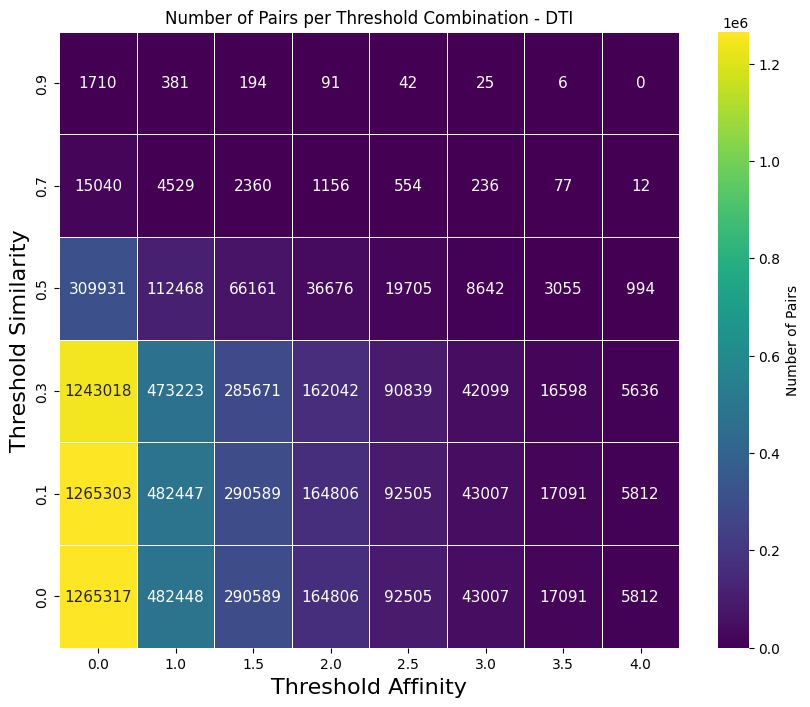

In [54]:
get_pairs_heatmap(results, 'DTI')

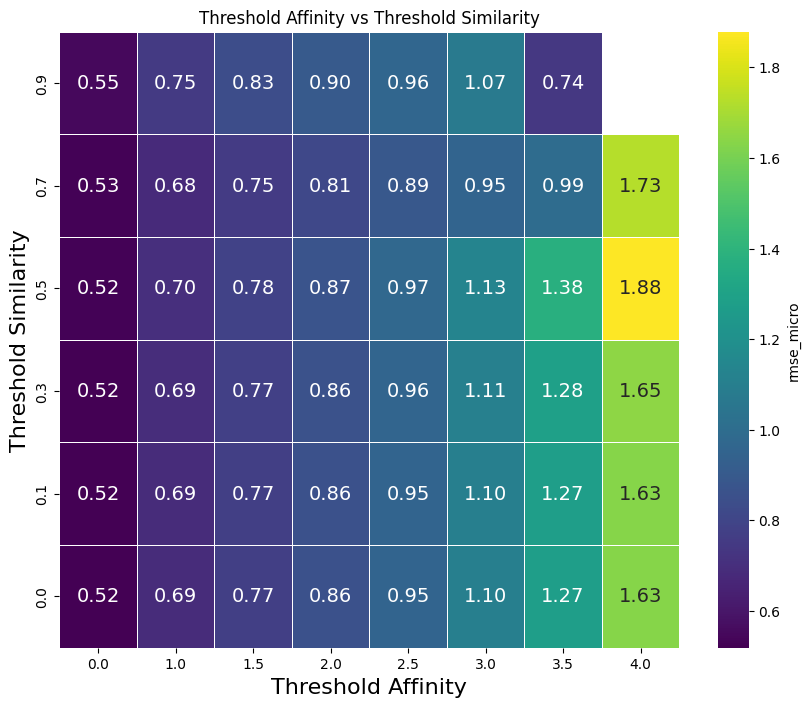

In [55]:
get_heatmap(results, 'rmse_micro', model_name='DTI_tl_nf_train_best')

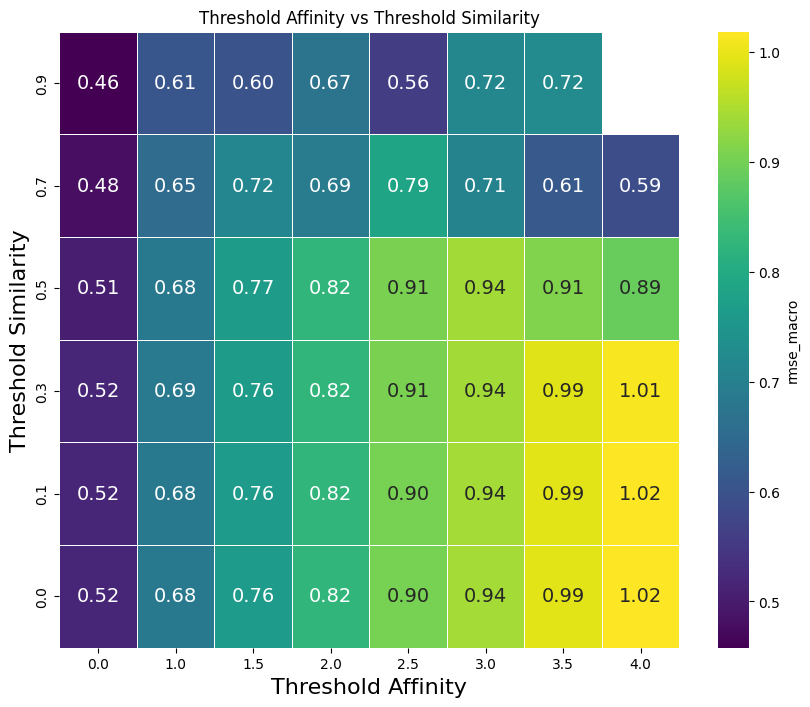

In [56]:
get_heatmap(results, 'rmse_macro', model_name='DTI_tl_nf_train_best')

In [22]:
results_init = pd.read_csv('../analysis/DTI_vary_all_train_best_1404_metrics.csv')

In [57]:
results_nf = pd.read_csv('../analysis/DTI_tl_nf_train_best_1504_metrics.csv')

In [41]:
results_f = pd.read_csv('../analysis/DTI_tl_f_train_best_1504_metrics.csv')

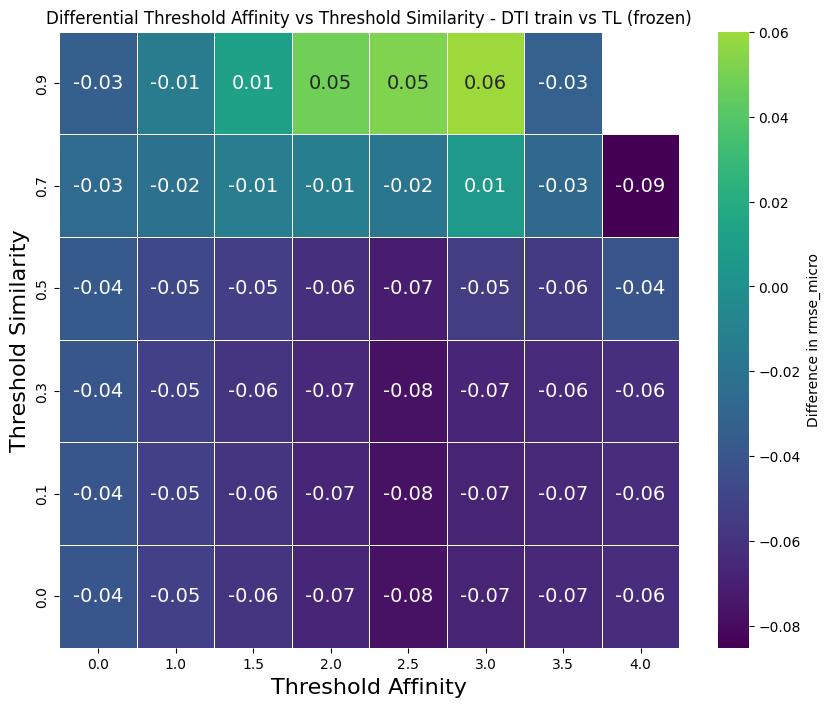

In [65]:
get_differential_heatmap(results_init, results_f, 'rmse_micro', 'DTI train vs TL (frozen)')